<a href="https://colab.research.google.com/github/vishwanathbeena/appliedai_practice/blob/main/8A_LR_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

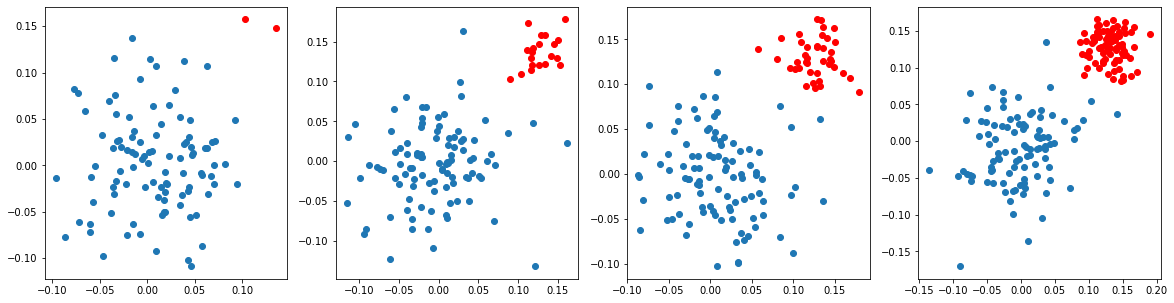

In [ ]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    Y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

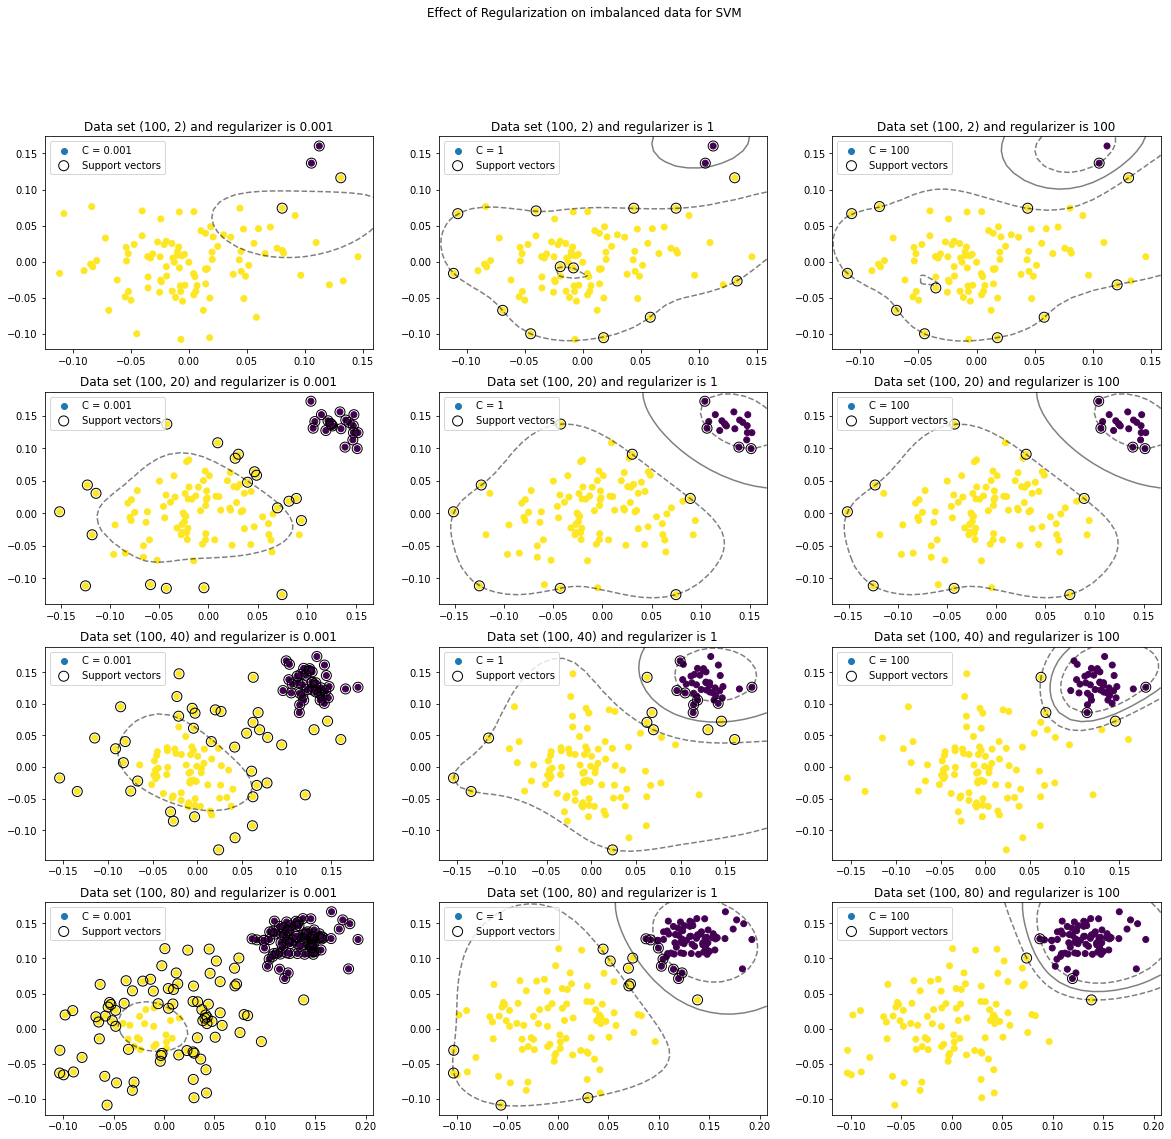

In [ ]:
C = [0.001,1,100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,18))
plt_cont = 1
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    Y=np.vstack((y_p,y_n))
    for k in range(len(C)):
      plt.subplot(len(ratios), len(C),plt_cont)
      clf = SVC(C=C[k])
      clf.fit(X,Y)
      sv = clf.support_vectors_
      plt.scatter(X[:, 0], X[:, 1],c=Y ,label = 'C = {}'.format(C[k]))
      #plt.scatter(sv[:,0],sv[:,1],c='r',label='Sup vecs')
      # Code taken from https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
      # plot the decision function 
      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()

      # create grid to evaluate model
      xx = np.linspace(xlim[0], xlim[1], 30)
      yy = np.linspace(ylim[0], ylim[1], 30)
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      Z = clf.decision_function(xy).reshape(XX.shape)

      # plot decision boundary and margins
      ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
      ax.scatter(sv[:, 0], sv[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k',label = 'Support vectors')
      plt.title('Data set {} and regularizer is {}'.format(i,C[k]))  
      plt.legend()      
      plt_cont += 1
plt.suptitle('Effect of Regularization on imbalanced data for SVM')      
plt.show()

  

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

From above graphs we can see that as we increase the value of C, the margin is decreasing. Since C is inverse of regularization, it is understood that, for large values of C, It is trying to overfit.

In all the cases,C=1 seem to have given comparatively better margin.

C.001 was clearly underfit, even though the data is visibly linearly separable.

C=100 has a very thing margin.even though it could identify support vectors with 100% prediction in all the cases of class imbalance, given a different test data set it might not perform well.

I felt class imbalance did not have much effect, Since it depends on support vectors.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

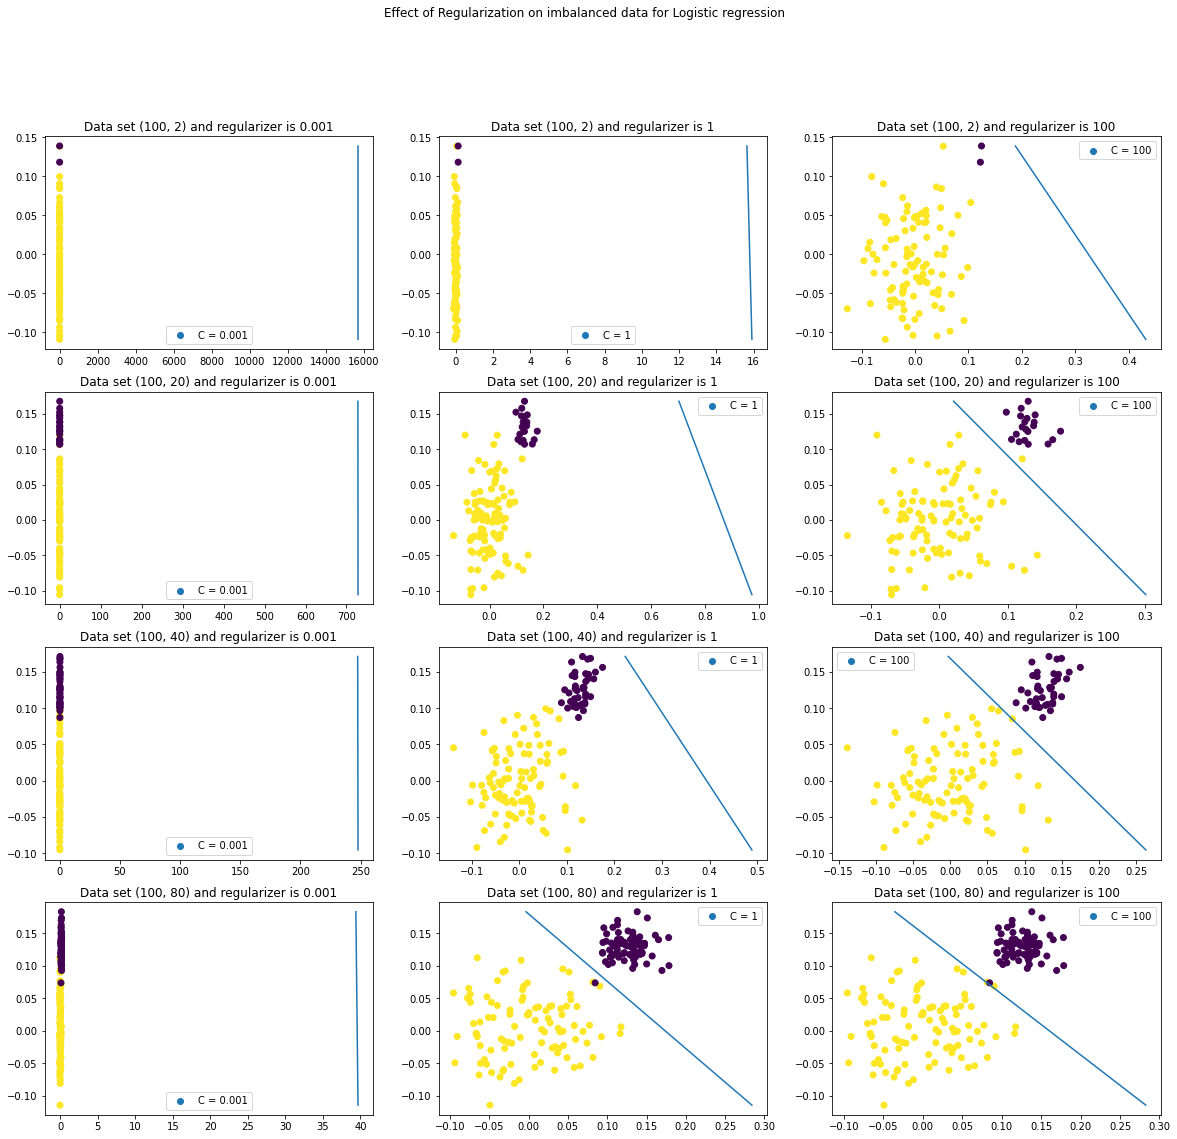

In [ ]:
#you can start writing code here.
C = [0.001,1,100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,18))
plt_cont = 1
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    Y=np.vstack((y_p,y_n))
    for k in range(len(C)):
      plt.subplot(len(ratios), len(C),plt_cont)
      clf = LogisticRegression(C=C[k])
      clf.fit(X,Y)
      plt.scatter(X[:, 0], X[:, 1],c=Y ,label = 'C = {}'.format(C[k]))
      draw_line(clf.coef_[0],clf.intercept_, np.min(X[:, 1]), np.max(X[:, 1]))
      plt.legend()
      plt.title('Data set {} and regularizer is {}'.format(i,C[k]))      
      plt_cont += 1
plt.suptitle('Effect of Regularization on imbalanced data for Logistic regression')
plt.show()

  